In [ ]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator as op
from functools import reduce
import time

In [ ]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [ ]:
'''
C1 = {'up': lil_matrix((4,4)), 'down': lil_matrix((4,4))}  # single-site creation/anihilation operators
C1['up'][0,1] = 1
C1['up'][2,3] = 1
C1['down'][0,2] = 1
C1['down'][1,3] = 1

C2 = {'up': kron(C1['up'],C1['up']), 'down': kron(C1['down'],C1['down'])}'''

"\nC1 = {'up': lil_matrix((4,4)), 'down': lil_matrix((4,4))}  # single-site creation/anihilation operators\nC1['up'][0,1] = 1\nC1['up'][2,3] = 1\nC1['down'][0,2] = 1\nC1['down'][1,3] = 1\n\nC2 = {'up': kron(C1['up'],C1['up']), 'down': kron(C1['down'],C1['down'])}"

In [ ]:
def Complete_Hamiltonian(H,U,n):
  k=4**n #total no. of states

  for i in range(k):
    key=bin(i)[2:]
    key=(2*n-len(key))*'0' + key #Appending additional zeros in the beginning

    key=[x for x in key]

    #Calculate Self-interaction energies
    for j in range(0,2*n,2):
      if key[j]=='1' and key[j+1]=='1':
        H[i,i]+=U
    
    #Calculate Hopping energies
    for j in range(2*n):
      if key[j]=='1':
        #Hopp right
        new_key=key.copy()
        new_key[j]='0'
        if j+2<2*n and key[j+2]=='0':
          new_key[j+2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,int(new_key,2)]=t

        #Hopp left
        new_key=key.copy()
        new_key[j]='0'
        if j-2>=0 and key[j-2]=='0':
          new_key[j-2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,int(new_key,2)]=t

  #plt.imshow(H)
  #plt.show()
  return H

In [ ]:
def Hubbard(t,U,n):
  k=4**n #total no. of states

  H = lil_matrix((k,k))
  #tm=time.time()
  H=Complete_Hamiltonian(H,U,n)
  #print(time.time()-tm)

  tm=time.time()
  l,v=eigsh(H, 1, which='SA') #Only one eigenvalue
  print("U: ",U,"  ", time.time()-tm)

  return l, v[:,0]

In [ ]:
def pairing_order(gs,n):
  gs_new=np.zeros(len(gs))

  for i in range(len(gs)):
    key=bin(i)[2:]
    key=(2*n-len(key))*'0' + key #Appending additional zeros in the beginning

    key=[x for x in key]
    
    #Calculate Pairing Order
    for j in range(0,2*n,2): #up_spin
      if key[j]=='0':
        for k in [j-1,j+3]:
          new_key=key.copy()
          new_key[j]='1'
          if k<2*n and k>=0 and key[k]=='0':
            new_key[k]='1'
            str1=""
            new_key=str1.join(new_key)
            gs_new[int(new_key,2)]+=(gs[i]**2)

    for j in range(1,2*n,2): #down_spin
      if key[j]=='0':
        for k in [j-3,j+1]:
          new_key=key.copy()
          new_key[j]='1'
          if k<2*n and k>=0 and key[k]=='0':
            new_key[k]='1'
            str1=""
            new_key=str1.join(new_key)
            gs_new[int(new_key,2)]+=(gs[i]**2)

  return gs_new

In [ ]:
def electron_density(gs,n):
  l=len(gs)
  density=np.zeros(2*n)
  for i in range(l):
    temp=bin(i)[2:]
    temp=(2*n-len(temp))*'0' + temp
    temp=np.array([int(x) for x in temp])
    density+=(gs[i]**2)*temp
  return density

In [ ]:
def local_electron_density(gs,n):
  density=electron_density(gs,n)

  loc=np.zeros(n)
  for i in range(n):
    loc[i]=density[2*i]+density[2*i+1]
  return loc

In [ ]:
def magnetic_moment(gs,n):
  density=electron_density(gs,n)

  mag=np.zeros(n)
  for i in range(n):
    mag[i]=density[2*i]-density[2*i+1]
  return mag

In [ ]:
t=-1
n=10 #no. of sites
U=8

In [ ]:
tm=time.time()
l,gs=Hubbard(t,U,n)
print(l, time.time()-tm)

U:  8    852.0477025508881
[-6.85773887] 925.3455739021301


In [ ]:
magnetic_moment(gs,n)

array([ 4.68514116e-14,  2.07056594e-14, -2.85327317e-14,  1.37667655e-14,
        3.00870440e-14, -2.91988655e-14, -1.63202785e-14,  2.70339306e-14,
       -1.95399252e-14, -4.59077221e-14])

In [ ]:
local_electron_density(gs,n)

array([0.58302895, 0.59947571, 0.63476488, 0.56138918, 0.62134128,
       0.62134128, 0.56138918, 0.63476488, 0.59947571, 0.58302895])

In [ ]:
po=pairing_order(gs,n)

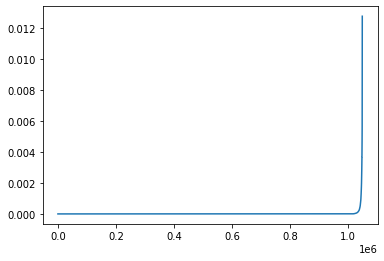

In [ ]:
plt.plot(np.sort(po))

In [ ]:
np.linalg.norm(po)

0.24566696490697704